In [10]:
# Import the modules
from matplotlib.pyplot import imshow
import numpy as np
import cv2

from keras.utils import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [11]:
SIZE = 256
img_data = []

img = cv2.imread("./img/autoencoders/monalisa.jpeg", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR to RGB
img = cv2.resize(img, (SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255

In [12]:
img_data2 = []
img2 = cv2.imread("./img/autoencoders/einstein.png", 1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # BGR to RGB
img2 = cv2.resize(img2, (SIZE, SIZE))
img_data2.append(img_to_array(img2))

img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255

In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3,3), activation="relu", padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3,3), activation="relu", padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3,3), activation="relu", padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8, (3,3), activation="relu", padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation="relu", padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3, (3,3), activation="relu", padding='same'))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)       

In [ ]:
model.fit(img_array, img_array2, epochs=10000, shuffle=True)

In [19]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 38ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


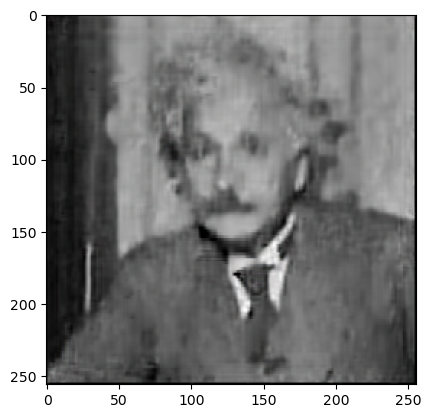

In [20]:
imshow(pred[0].reshape(SIZE, SIZE, 3), cmap="gray") # ı give mona lisa pic as input!